<a href="https://colab.research.google.com/github/Dina-Nabil/Coins-Detection/blob/master/Coins_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#from google.colab import files
#uploaded = files.upload()

In [0]:
import matplotlib.pyplot as plt
import cv2 as cv
def plot_image(image,color,title):
  plt.grid("false")
  plt.title(title)
  if(color=='colored'):
    plt.imshow(image)
  elif(color=="gray"):
    plt.imshow(image,cmap='gray',interpolation="bicubic")

In [0]:
def BGR2RGB(image):
  return cv.cvtColor(image,cv.COLOR_BGR2RGB)

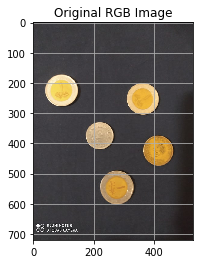

In [646]:
import cv2 as cv
image = cv.imread('gen9.jpg')
RGB_image=BGR2RGB(image)
plot_image(RGB_image,"colored","Original RGB Image")

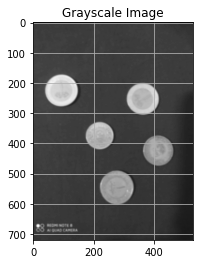

In [647]:
gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
plot_image(gray_image,"gray","Grayscale Image")

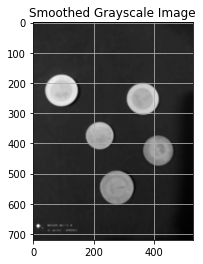

In [648]:
median_image=cv.medianBlur(gray_image,7)
plot_image(median_image,"gray","Smoothed Grayscale Image")

**Edge Detection Using Canny's Algorithm**

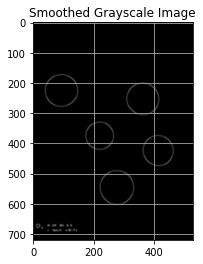

In [649]:
edges=cv.Canny(median_image,250,280)
plot_image(edges,"gray","Smoothed Grayscale Image")

**Hough Transform**

In [0]:
def circle(x,y,b,r):
  a=x-np.sqrt(r**2-(y-b)**2)
  return int(round(a))

In [0]:
import numpy as np
def CHT(edges,r):
  H=np.zeros(edges.shape)
  b_range=1000
  display(b_range)
  for x,y in np.ndindex(edges.shape):
    if(edges[x,y]==255):
      for b in range (b_range):
        if((y-b)**2<=r**2):
          a=circle(x,y,b,r)
          H[a,b]+=1
  plot_image(H,"gray","Hough space")
  return H
          

In [0]:
monetary_value=0

In [0]:
def calc_monetary(monetary_value,no_of_centres,type_of_coin):
  if(type_of_coin=="pound"):
    monetary_value+=no_of_centres
  elif(type_of_coin=="_50"):
    monetary_value+=no_of_centres*0.5
  else:
    monetary_value+=no_of_centres*0.25
  return monetary_value

1000

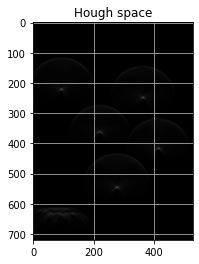

In [654]:
H_pound=CHT(edges,56)

1000

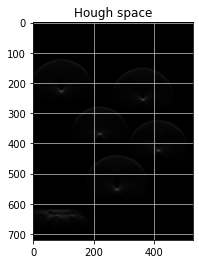

In [655]:
H_50=CHT(edges,50)

1000

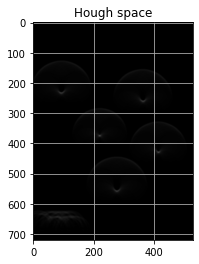

In [656]:
H_25=CHT(edges,45)

In [0]:
import skimage.feature as sk
def find_peaks(H):
  peaks=sk.peak_local_max(H,threshold_abs=58)
  return peaks 

In [0]:
def plot_circle(peaks,radius,r,b,g,title,copy):
  for i in np.ndindex(peaks.shape[0]):
    cx=peaks[i][0]
    cy=peaks[i][1]
    if(cx!=0 and cy!=0):
      cv.circle(copy,(cy,cx),radius,(r,b,g),7)
  plot_image(copy,"colored",title)
  

In [0]:
def NMS(peaks,r):
  for i in np.ndindex(peaks.shape[0]):
    for j in range(i[0]+1,peaks.shape[0]):
      cx1=peaks[i][0]
      cy1=peaks[i][1]
      cx2=peaks[j,0]
      cy2=peaks[j,1]
      if(cx1+cy1!=0 and cx2+cy2!=0):
        distance=np.sqrt((cy2-cy1)**2+(cx2-cx1)**2)
        if(distance<2*r):
          peaks[j,0]=0
          peaks[j,1]=0


In [0]:
output=RGB_image

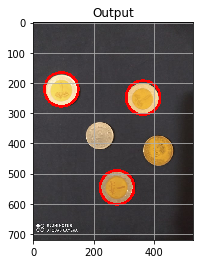

In [661]:
peaks_pound=find_peaks(H_pound)
NMS(peaks_pound,56)
plot_circle(peaks_pound,56,255,0,0,"Output",output)
count_pounds=peaks_pound.shape[0]-np.sum(~peaks_pound.any(1))
monetary_value=calc_monetary(monetary_value,count_pounds,"pound")

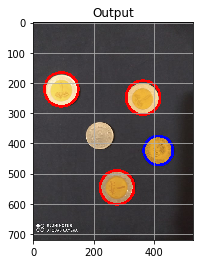

In [662]:
peaks_50=find_peaks(H_50)
NMS(peaks_50,48)
plot_circle(peaks_50,48,0,0,255,"Output",output)
count_50=peaks_50.shape[0]-np.sum(~peaks_50.any(1))
monetary_value=calc_monetary(monetary_value,count_50,"_50")

array([[375, 220]])

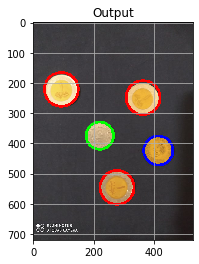

In [663]:
peaks_25=find_peaks(H_25)
display(peaks_25)
NMS(peaks_25,45)
plot_circle(peaks_25,45,0,255,0,"Output",output)
count_25=peaks_25.shape[0]-np.sum(~peaks_25.any(1))
monetary_value=calc_monetary(monetary_value,count_25,"_25")

In [664]:
print(count_pounds,"pounds,",count_50,"50_piasters and ",count_25,"25_piasters were detected.")
print(monetary_value)

3 pounds, 1 50_piasters and  1 25_piasters were detected.
3.75
